In [ ]:
import os
import re
import requests
import zipfile,io
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
from typing import Callable
%matplotlib inline 

In [ ]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
data_dir = os.path.join(os.curdir, "data")
tweets_dir = os.path.join(data_dir, "arsentd-lev")

In [ ]:
link="http://oma-project.com/ArSenL/ArSenTD-LEV.zip"
response=requests.get(link)


In [ ]:

z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(tweets_dir)
os.listdir(tweets_dir)

['ArSenTD-LEV.tsv', 'README.txt']

In [ ]:
raw_filepath=os.path.join(tweets_dir,'ArSenTD-LEV.tsv')
raw = pd.read_csv(filepath_or_buffer=raw_filepath, sep="\t", encoding="utf_8")

In [ ]:
raw.head()

,Tweet,Country,Topic,Sentiment,Sentiment_Expression,Sentiment_Target
0,"""أنا أؤمن بأن الانسان ينطفئ جماله عند ابتعاد م...",lebanon,personal,negative,implicit,بريق العيون
1,من الذاكره... @3FInQe . عندما اعتقد كريستيانو ...,jordan,sports,positive,explicit,افضل لاعب في العالم
2,لا نخلو من ضغوطات الحياة. فنحن نعيش على أرض أع...,palestine,personal,neutral,none,none
3,#مصطلحات_لبنانيه_حيرت_البشريه بتوصل عالبيت ، ب...,lebanon,personal,negative,explicit,مصطلحات_لبنانيه
4,نصمت !! لتسير حياتنا على مً يرام فالناّس لم تع...,palestine,personal,negative,explicit,س لم تعد كما ك


**Explority Data Analysis**

In [ ]:
data=raw.copy(deep=True)

In [ ]:
data['Sentiment'].value_counts()

negative         1253
neutral           885
positive          835
very_negative     630
very_positive     397
Name: Sentiment, dtype: int64

In [ ]:
data['Sentiment']=data['Sentiment'].replace(
    {'very_negative':'negative',
    'very_positive':'positive'}
)

In [ ]:
data['Sentiment'].value_counts()

negative    1883
positive    1232
neutral      885
Name: Sentiment, dtype: int64

In [ ]:
sentiment_count=data.groupby(by='Sentiment',as_index=False).count()[['Sentiment','Tweet']]

In [ ]:
sentiment_count

,Sentiment,Tweet
0,negative,1883
1,neutral,885
2,positive,1232


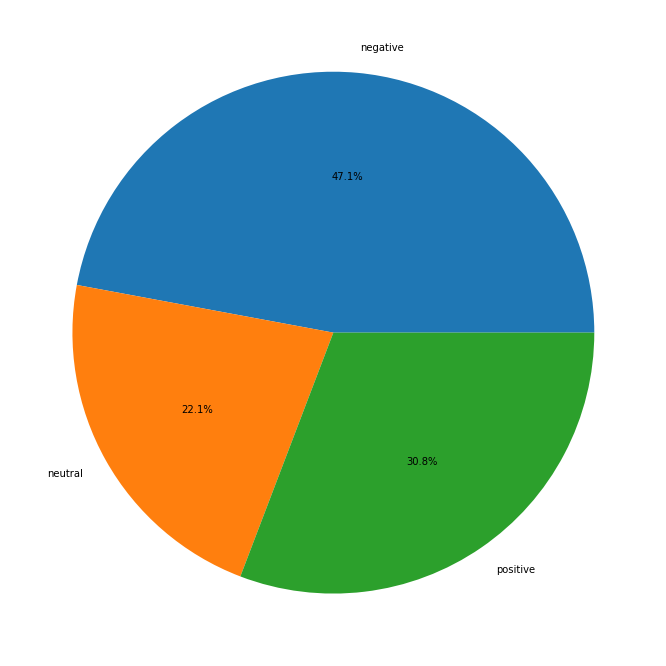

In [ ]:
fig,ax=plt.subplots(figsize=(15,12))
ax.pie(x=sentiment_count['Tweet'],labels=sentiment_count['Sentiment'], autopct='%1.1f%%');

Common EDA Pattern Text
to count the characters
to count the the words

In [ ]:
data['word_count']=data['Tweet'].apply(lambda x:len(x.split(' ')))

In [ ]:
data['word_count'].describe()

count    4000.00000
mean       22.69825
std         3.28495
min         7.00000
25%        21.00000
50%        23.00000
75%        25.00000
max        35.00000
Name: word_count, dtype: float64

In [ ]:
data['char_count']=data['Tweet'].apply(len)
data['char_count'].describe()

count    4000.000000
mean      131.364250
std        14.314636
min        42.000000
25%       128.000000
50%       138.000000
75%       140.000000
max       147.000000
Name: char_count, dtype: float64

**Vocabulary**

In [ ]:
all_words=[word for tweet in data['Tweet']for word in tweet.split(" ")]
vocab=Counter(all_words)
len(vocab)

26552

**Explore most and least Common words in vocab**

In [ ]:
print('Least_Common')
vocab.most_common()[-10:]


Least_Common


[('الريحة', 1),
 ('نقلاً', 1),
 ('مباشراً', 1),
 ('نشرة', 1),
 ('الرياضية', 1),
 ('8:30', 1),
 ('"العرب"', 1),
 ('حمود', 1),
 ('📍', 1),
 ('https://t.co/oUstA9G7dM', 1)]

In [ ]:
print('Most_Common')
vocab.most_common(10)

Most_Common


[('من', 1906),
 ('في', 1610),
 ('.', 1105),
 ('و', 963),
 ('على', 913),
 ('الله', 787),
 ('ما', 769),
 ('لا', 656),
 ('،', 589),
 ('كل', 493)]

In [ ]:
counts=list(vocab.values())

Text(0.5, 1.0, 'Word_Count')

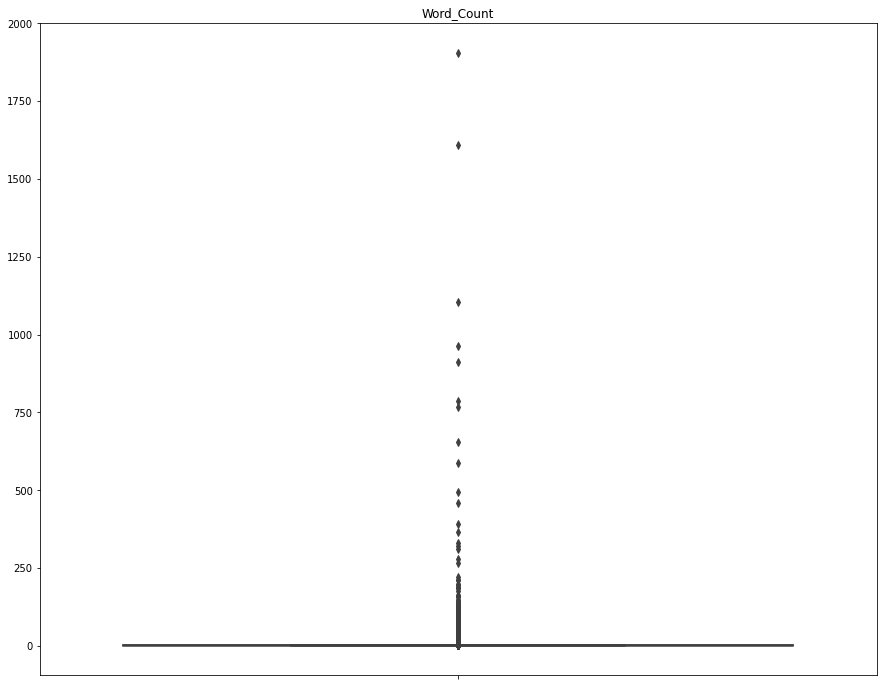

In [ ]:
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(y=counts,ax=ax)
ax.set_title("Word_Count")

In [ ]:
stop_words=stopwords.words("arabic")
all_words_pruned=[word for tweet in data['Tweet'] for word in tweet.split(" ")if word not in stop_words]


In [ ]:
pruned_vocab=Counter(all_words_pruned)
pruned_vocab

Counter({'"أنا': 3,
         'أؤمن': 2,
         'بأن': 32,
         'الانسان': 13,
         'ينطفئ': 2,
         'جماله': 2,
         'ابتعاد': 2,
         'يحب': 6,
         '،': 589,
         'بريق': 4,
         'العيون': 4,
         'يختفي': 2,
         'فيصبح': 2,
         'ذابلاً': 2,
         'منطفئًا،': 2,
         'يتحول': 2,
         'ربيعه': 2,
         'الى': 222,
         'خريف.".': 2,
         '@gbraniiat': 2,
         'الذاكره...': 2,
         '@3FInQe': 2,
         '.': 1105,
         'عندما': 99,
         'اعتقد': 9,
         'كريستيانو': 4,
         'انه': 76,
         'افضل': 27,
         'لاعب': 24,
         'العالم': 74,
         'كاكا': 2,
         'ميسي': 8,
         'ثالثاً': 2,
         'حدث': 13,
         'العكس': 3,
         '😂😂😂😂😂😂': 2,
         'https://t.co/n3EZ0pX0X7': 2,
         'نخلو': 2,
         'ضغوطات': 5,
         'الحياة.': 7,
         'فنحن': 8,
         'نعيش': 13,
         'أرض': 7,
         'أعدت': 2,
         'للبلاء': 2,
         'ولم': 21,

In [ ]:
len(pruned_vocab)

26250

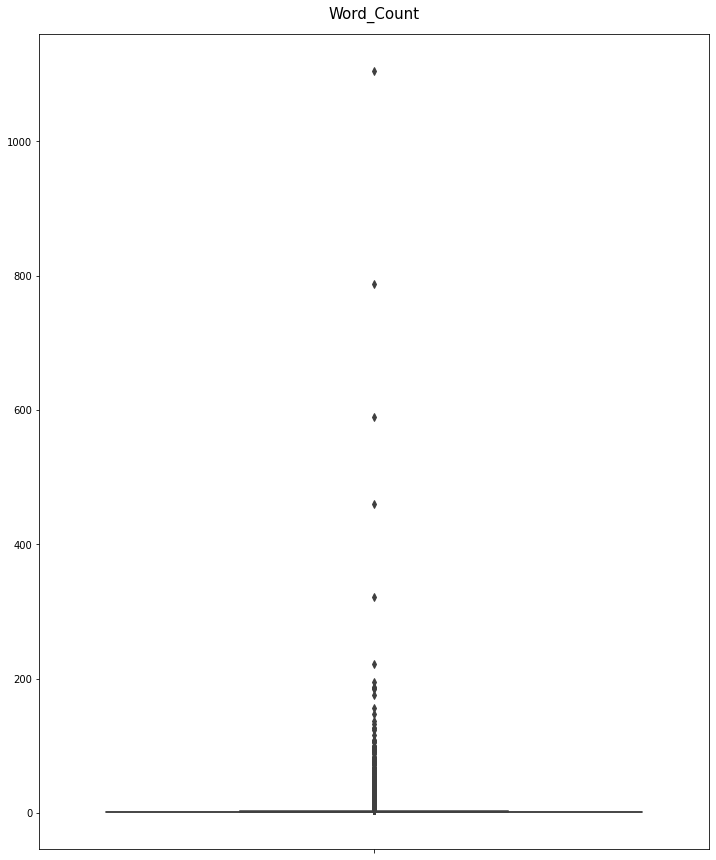

In [ ]:
counts=list(pruned_vocab.values())
fig,ax=plt.subplots(figsize=(12,15))
sns.boxplot(y=counts,ax=ax)
ax.set_title("Word_Count",fontdict=dict(size=15),pad=15)
plt.show()

**Text Cleaning**

In [ ]:
sample=data['Tweet'].iloc[102]
sample

'هدف لا نراه كل يوم . #LEITOT . @oki_q8e شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA'

In [ ]:
def test_clean_fn(fn: Callable, sample: str) -> str:
    print(sample, fn(sample), sep="\n")

# **Stop Words**

In [ ]:
to_keep = ["لا"]
stop_words = [word for word in stopwords.words("arabic") if word not in to_keep] 

def remove_stop_words(text: str) -> str:
    return " ".join([word for word in text.split(" ") if word not in stop_words])


test_clean_fn(remove_stop_words, sample)


هدف لا نراه كل يوم . #LEITOT . @oki_q8e شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA
هدف لا نراه يوم . #LEITOT . @oki_q8e شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA


#Removing Hashtag

In [ ]:
hashtag_re=re.compile(pattern='#[A-Za-z0-9_ا_ي]+')
def remove_hashtag(text:str) -> str:
  return hashtag_re.sub(repl=" ",string=text)

test_clean_fn(remove_hashtag,sample)

هدف لا نراه كل يوم . #LEITOT . @oki_q8e شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA
هدف لا نراه كل يوم .   . @oki_q8e شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA


#Remove Mentions

In [ ]:
def remove_mentions(text:str) -> str:
  return re.sub(pattern=r"@[^\s]+" ,repl="", string=text)

text_clean_fn(remove_mentions,sample)

هدف لا نراه كل يوم . #LEITOT . @oki_q8e شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA
هدف لا نراه كل يوم . #LEITOT .  شوف ابن اختي شوف 🤗 https://t.co/ZmVMl4sOqA
